# Workshop 1: House Pricing Regression
In this workshop you will need to train a regression neural network to estimate the pricing of houses of California. The main blocks of the workshop are:

- Get the data from Keras repository and visualize it.
- Pre-process the data.
- Design the network.
- Train the network.
- Evaluate the model.

[Info of the data](https://www.kaggle.com/datasets/camnugent/california-housing-prices))

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

tf.random.set_seed(1234)

# 1. Get the data (Already in Colab)

In [2]:
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [3]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

In [4]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
train_data.shape, test_data.shape

((17000, 9), (3000, 9))

In [6]:
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17000, 8), (17000,), (3000, 8), (3000,))

# 2. Pre-process the data.

In [8]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(
    standard_scaler.fit_transform(x_train),
    columns=x_train.columns
)
x_test_scaled = pd.DataFrame(
    standard_scaler.transform(x_test),
    columns = x_test.columns
)

In [9]:
x_train_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454


# 3. Design the network.

In [10]:
def create_model():
  model = Sequential([
      Dense(32, input_dim=8, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1, activation='linear') # we use a linear function to get the same value as the output of the previous layer
    ])
  return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss='mse', # mean squared error
    optimizer=Adam(learning_rate=1e-3), 
    metrics=['mse']
)

# 4. Train the network.

In [13]:
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
213/213 [==============================] - 7s 5ms/step - loss: 51023532032.0000 - mse: 51023532032.0000 - val_loss: 76126208000.0000 - val_mse: 76126208000.0000
Epoch 2/10
213/213 [==============================] - 2s 7ms/step - loss: 42439704576.0000 - mse: 42439704576.0000 - val_loss: 65060999168.0000 - val_mse: 65060999168.0000
Epoch 3/10
213/213 [==============================] - 1s 7ms/step - loss: 19936636928.0000 - mse: 19936636928.0000 - val_loss: 49100230656.0000 - val_mse: 49100230656.0000
Epoch 4/10
213/213 [==============================] - 1s 6ms/step - loss: 12392883200.0000 - mse: 12392883200.0000 - val_loss: 38934224896.0000 - val_mse: 38934224896.0000
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 10590183424.0000 - mse: 10590183424.0000 - val_loss: 30608279552.0000 - val_mse: 30608279552.0000
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 9182379008.0000 - mse: 9182379008.0000 - val_loss: 23716128768.000

In [14]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

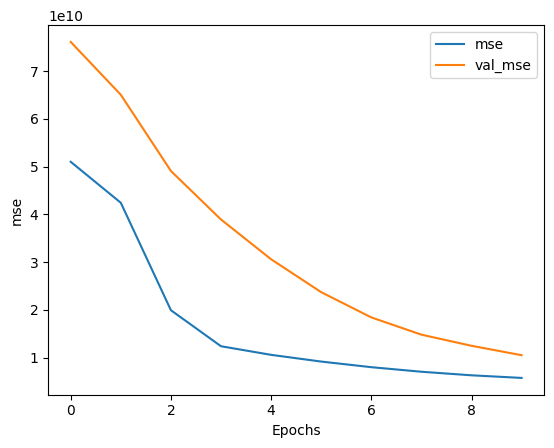

In [15]:
# Loss: MSE | Learnin Rate: 1e-03
plot_history(history, 'mse')

Epoch 1/10
213/213 [==============================] - 4s 5ms/step - loss: 24311150592.0000 - mse: 24311150592.0000 - val_loss: 16065905664.0000 - val_mse: 16065905664.0000
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 5435972096.0000 - mse: 5435972096.0000 - val_loss: 7216862720.0000 - val_mse: 7216862720.0000
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 4416454144.0000 - mse: 4416454144.0000 - val_loss: 5708950016.0000 - val_mse: 5708950016.0000
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 4241711104.0000 - mse: 4241711104.0000 - val_loss: 5441889792.0000 - val_mse: 5441889792.0000
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 4159891712.0000 - mse: 4159891712.0000 - val_loss: 5461927936.0000 - val_mse: 5461927936.0000
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 4128289024.0000 - mse: 4128289024.0000 - val_loss: 5392128512.0000 - val_mse: 5392

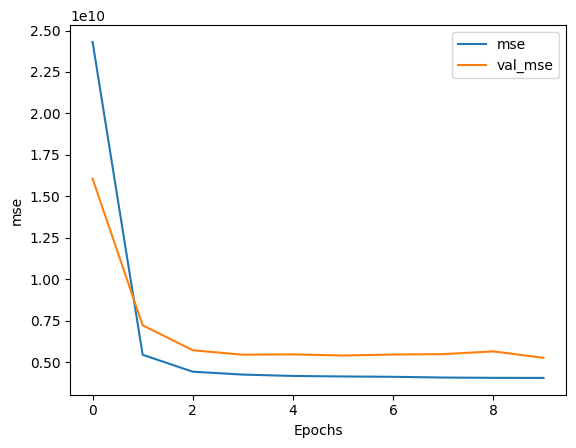

In [16]:
# Loss: MSE | Learnin Rate: 1e-02
model = create_model()
model.compile(
    loss='mse', 
    optimizer=Adam(learning_rate=1e-2), 
    metrics=['mse']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'mse')

Epoch 1/10
213/213 [==============================] - 3s 5ms/step - loss: 81.1775 - msle: 81.1775 - val_loss: 55.2712 - val_msle: 55.2712
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 36.8960 - msle: 36.8960 - val_loss: 35.4304 - val_msle: 35.4304
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 23.6794 - msle: 23.6794 - val_loss: 25.6557 - val_msle: 25.6557
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 16.6896 - msle: 16.6896 - val_loss: 19.6089 - val_msle: 19.6089
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 12.3241 - msle: 12.3241 - val_loss: 15.4832 - val_msle: 15.4832
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 9.3672 - msle: 9.3672 - val_loss: 12.4934 - val_msle: 12.4934
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 7.2573 - msle: 7.2573 - val_loss: 10.2439 - val_msle: 10.2439
Epoch 8/10
213/213 [==================

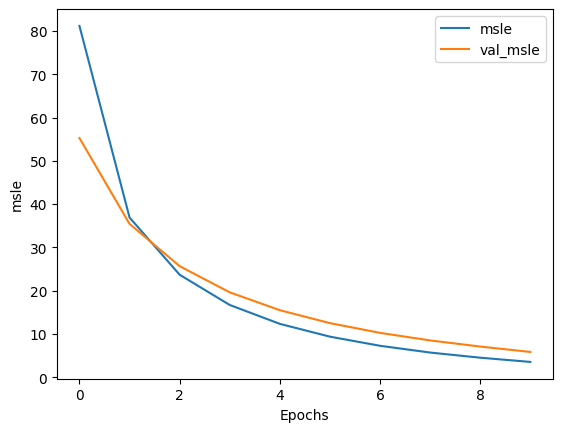

In [17]:
# Loss: MSLE | Learnin Rate: 1e-03
model = create_model()
model.compile(
    loss='msle', 
    optimizer=Adam(learning_rate=1e-3), 
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

Epoch 1/10
213/213 [==============================] - 2s 5ms/step - loss: 21.5222 - msle: 21.5222 - val_loss: 6.5327 - val_msle: 6.5327
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 1.7535 - msle: 1.7535 - val_loss: 1.8100 - val_msle: 1.8100
Epoch 3/10
213/213 [==============================] - 1s 6ms/step - loss: 0.3949 - msle: 0.3949 - val_loss: 0.7602 - val_msle: 0.7602
Epoch 4/10
213/213 [==============================] - 1s 6ms/step - loss: 0.3113 - msle: 0.3113 - val_loss: 0.6014 - val_msle: 0.6014
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2733 - msle: 0.2733 - val_loss: 0.5029 - val_msle: 0.5029
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2431 - msle: 0.2431 - val_loss: 0.4360 - val_msle: 0.4360
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2185 - msle: 0.2185 - val_loss: 0.3872 - val_msle: 0.3872
Epoch 8/10
213/213 [==============================] - 1s 4ms

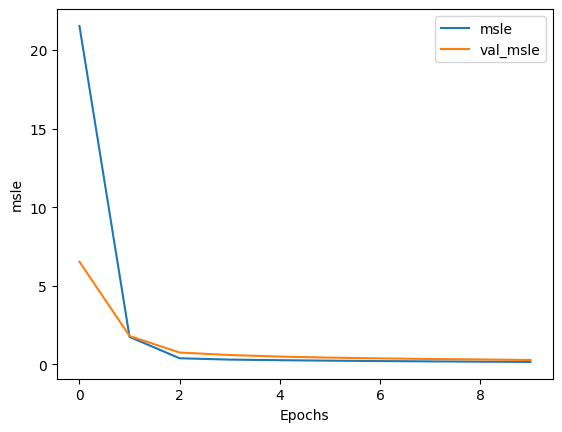

In [18]:
# Loss: MSLE | Learnin Rate: 1e-02
model = create_model()
model.compile(
    loss='msle', 
    optimizer=Adam(learning_rate=1e-2), 
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

Epoch 1/10
213/213 [==============================] - 5s 8ms/step - loss: 135.4195 - msle: 135.4195 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 2/10
213/213 [==============================] - 2s 7ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 3/10
213/213 [==============================] - 2s 10ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 4/10
213/213 [==============================] - 2s 10ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 5/10
213/213 [==============================] - 2s 8ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoc

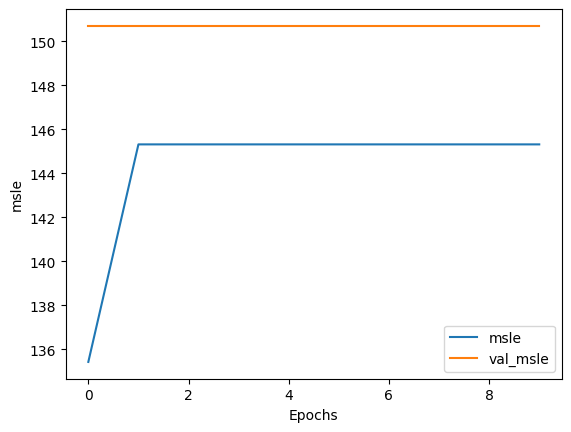

In [19]:
# Loss: MSLE | Learnin Rate: 1
model = create_model()
model.compile(
    loss='msle', 
    optimizer=Adam(learning_rate=1), 
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

# Exercise 1: Re-train the model to improve its performance and evaluate it on the test set

Epoch 1/100
213/213 [==============================] - 3s 5ms/step - loss: 85.6287 - msle: 85.6287 - val_loss: 57.8791 - val_msle: 57.8791
Epoch 2/100
213/213 [==============================] - 1s 4ms/step - loss: 39.9212 - msle: 39.9212 - val_loss: 37.0710 - val_msle: 37.0710
Epoch 3/100
213/213 [==============================] - 1s 4ms/step - loss: 25.7103 - msle: 25.7103 - val_loss: 27.1350 - val_msle: 27.1350
Epoch 4/100
213/213 [==============================] - 1s 5ms/step - loss: 18.4746 - msle: 18.4746 - val_loss: 21.1377 - val_msle: 21.1377
Epoch 5/100
213/213 [==============================] - 1s 5ms/step - loss: 13.9775 - msle: 13.9775 - val_loss: 17.0153 - val_msle: 17.0153
Epoch 6/100
213/213 [==============================] - 1s 4ms/step - loss: 10.8820 - msle: 10.8820 - val_loss: 13.9725 - val_msle: 13.9725
Epoch 7/100
213/213 [==============================] - 1s 4ms/step - loss: 8.6227 - msle: 8.6227 - val_loss: 11.6298 - val_msle: 11.6298
Epoch 8/100
213/213 [========

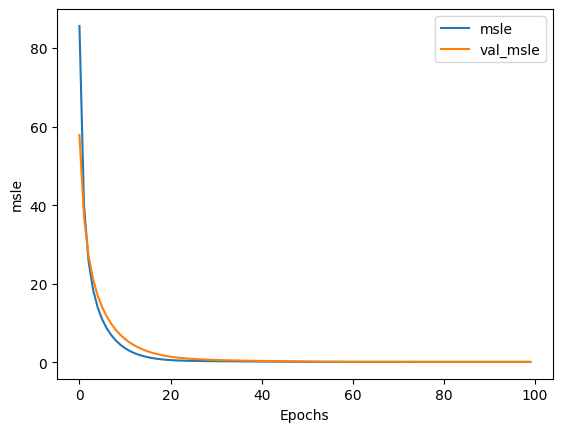

Test loss: 0.09938449412584305
Test metric: 0.09938449412584305


In [28]:



# Loss: MSLE | Learnin Rate: 1e-03
model = create_model()
model.compile(
    loss='msle', 
    optimizer=Adam(learning_rate=1e-3), 
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')


# Evaluate the model
score = model.evaluate(x_test_scaled.values, y_test.values, verbose=0)
print('Test loss:', score[0])
print('Test metric:', score[1])



In [29]:
# Predict on the test set

test_data['prediction'] = model.predict(x_test_scaled)


test_data['error'] = (test_data['median_house_value']- test_data['prediction']).abs()

test_data['error_pct'] = (test_data['error']/test_data['median_house_value'])*100



94/94 [==============================] - 0s 1ms/step


In [31]:
# Compare the results with the ground truth

print(test_data['error_pct'].mean())

test_data.head(20)

24.156942985847977


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prediction,error,error_pct
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,347189.812500,2489.812500,0.722313
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,189133.203125,12633.203125,7.157622
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,260280.828125,10219.171875,3.777882
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,323179.218750,6820.781250,2.066903
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,89583.742188,7883.742188,9.649623
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0,57427.000000,9573.000000,14.288060
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0,74321.265625,7321.265625,10.927262
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0,195760.359375,28860.359375,17.292007
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0,201833.609375,7433.609375,3.823873
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0,116836.554688,47363.445312,28.844973
